# Exploratory Data Analysis

## Loading and Cleaning Dataset

In [1]:
#  Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#  Using 'datasets' library to load dataset from hugging face (https://huggingface.co/datasets/lukebarousse/data_jobs)
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#  Data Cleanup
#  Converting str to datetime
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
#  Converting str to list
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

## Filter for US Data Analyst Roles

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [5]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

### Count of Job Locations for Data Analysts in the US

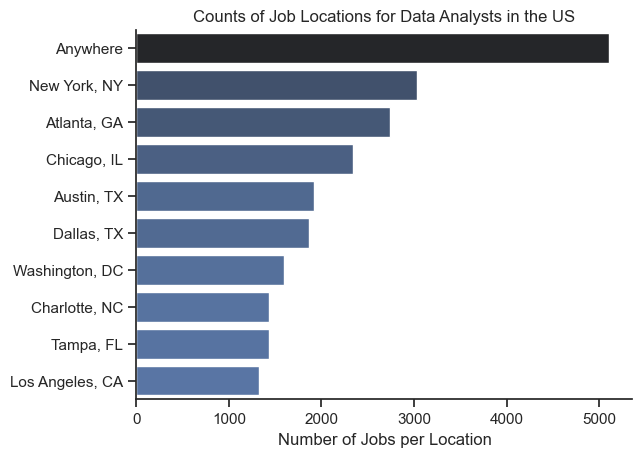

In [12]:
sns.set_theme(style='ticks')

sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title('Counts of Job Locations for Data Analysts in the US')
plt.xlabel('Number of Jobs per Location')
plt.ylabel('')

plt.show()

### Job Opportunities and Benefits

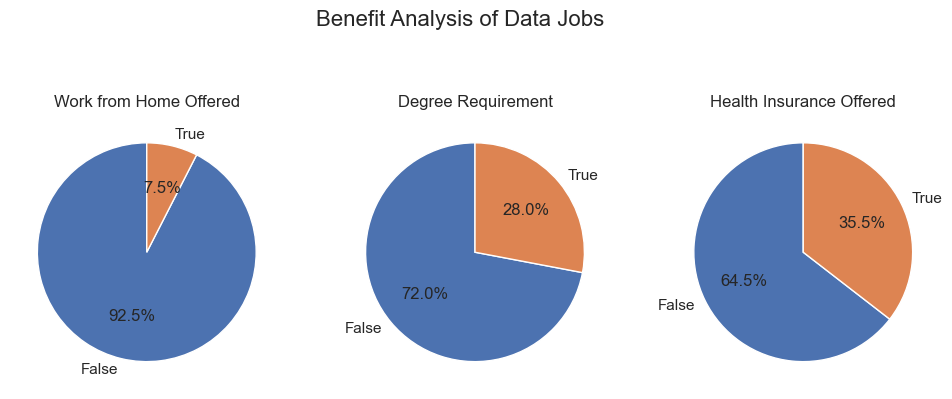

In [24]:
# rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()

### Companies to Explore

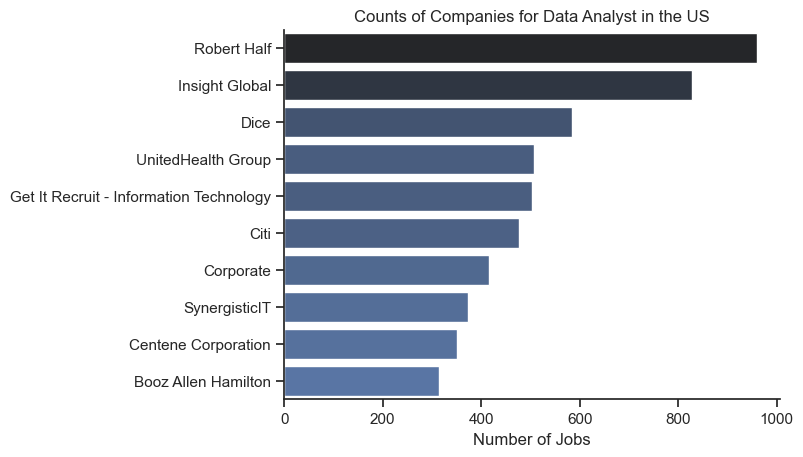

In [15]:
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()